<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import random as rnd
import numpy as np #Esta libreria incluye algunas funciones matematicas. No necesitamos math
import matplotlib.pyplot as plt
import math

In [200]:
def muestra(n):
  contador = 0
  x = np.linspace(0,1,100)
  plt.plot(x,np.sqrt(1-x**2))
  puntos=[]
  for i in range(n):
    #Generamos una uniforme
    u_1 = rnd.random() #Genera números aleatorios entre 0 y 1
    u_2 = rnd.random()
    if u_2 <= math.sqrt(1-u_1**2):
       contador += 1
       plt.scatter(u_1,u_2,color = 'blue')
       puntos.append(1)
    else:
       plt.scatter(u_1,u_2,color = 'red')
       puntos.append(0)
  plt.title('Puntos generados')
  plt.xlabel('u_1')
  plt.ylabel('u_2')

  return puntos,contador

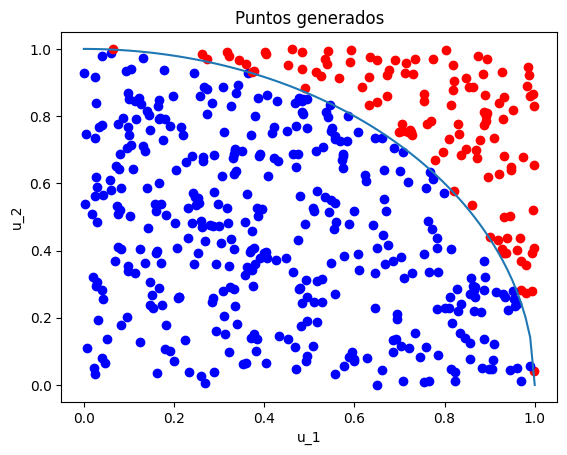

In [201]:
n=500
puntos,ptos_dentro=muestra(n)

In [202]:
# Calcular la estimación de pi
pi_estimate = (ptos_dentro / n) * 4
print(f"Estimación de Pi: {pi_estimate}")


Estimación de Pi: 3.064


In [ ]:
# Lista para almacenar las estimaciones de Pi
num_estimaciones=1000
estimaciones_pi = []

for _ in range(num_estimaciones):

    puntos, ptos_dentro = muestra(n)
    pi_estimate = (ptos_dentro / n) * 4
    estimaciones_pi.append(pi_estimate)

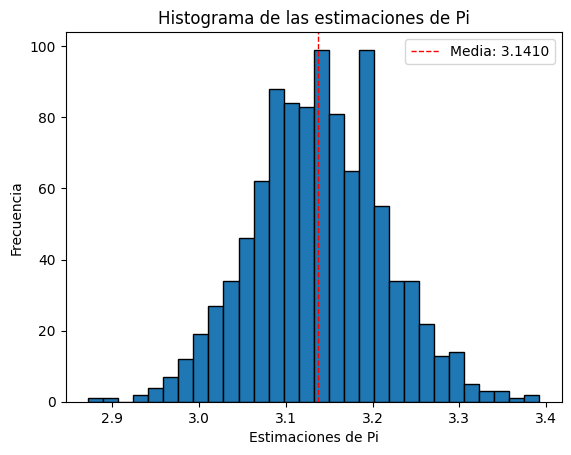

In [171]:
# Graficar el histograma de las estimaciones de Pi
plt.hist(estimaciones_pi, bins=30, edgecolor='black')
plt.title('Histograma de las estimaciones de Pi')
plt.xlabel('Estimaciones de Pi')
plt.ylabel('Frecuencia')
plt.axvline(np.mean(estimaciones_pi), color='r', linestyle='dashed', linewidth=1, label=f'Media: {np.mean(estimaciones_pi):.4f}')
plt.legend()
plt.show()

In [172]:
mu=np.mean(num_estimaciones)  #Calculamos la media de estimacion
print(mu)

3.137272


In [175]:
sigma2=np.var(num_estimaciones) #Calculamos la varianza de G
print(sigma2)

0.005707886016000001


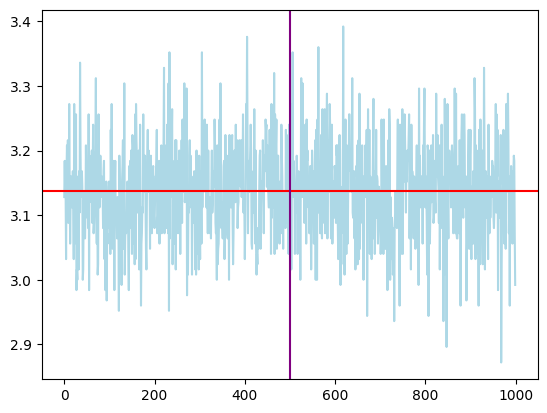

In [181]:
plt.plot(num_estimaciones,color='lightblue')  #Graficamos los valores de G obtenidos
plt.axhline(mu,color="red")
plt.axvline(500,color="purple")

In [177]:
def cdf(num_estimaciones):  #Definimos una nueva funsión
  n = len(num_estimaciones)  #Calculamos el número de elementos en la lista G.
  x = np.sort(num_estimaciones) #Ordena los valores de G en orden ascendente.
  y = np.arange(0,n)/n   #Obtenemo las probabilidades acumuladas
  return x,y

In [178]:
x,y = cdf(num_estimaciones) #Obtenemos los valores de x , y

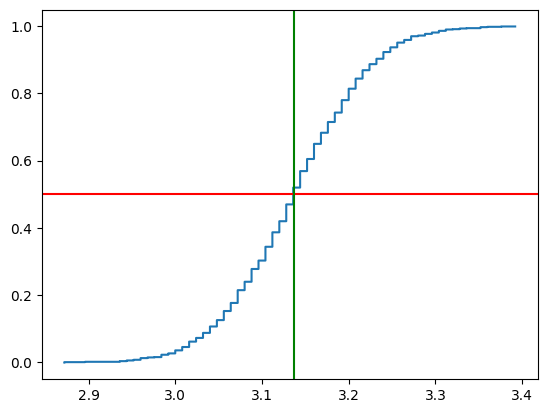

In [179]:
plt.step(x,y)
plt.axhline(0.5,color="red")  #Graficamos una línea horizontal en y=0.5 (punto medio)
plt.axvline(mu,color="green") #Graficamos la media